In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import glob as glob
import os

from zipfile import ZipFile
from urllib.request import urlretrieve

In [2]:
def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assests....", end="")

    # Downloading zip file using urllib package.
    urlretrieve(url, save_path)

    try:
        # Extracting zip file using the zipfile package.
        with ZipFile(save_path) as z:
            # Extract ZIP file contents in the same directory.
            z.extractall(os.path.split(save_path)[0])

        print("Done")

    except Exception as e:
        print("\nInvalid file.", e)

In [3]:
URL = r"https://www.dropbox.com/s/8srx6xdjt9me3do/TF-Keras-Bootcamp-NB07-assets.zip?dl=1"

asset_zip_path = os.path.join(os.getcwd(), "TF-Keras-Bootcamp-NB07-assets.zip")

# Download if assest ZIP does not exists. 
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path) 

In [5]:
image_paths = sorted(glob.glob("images" + os.sep + "*.png"))
print(image_paths)

['images\\baseball-player.png', 'images\\clown-fish.png', 'images\\elephant.png', 'images\\forklift.png', 'images\\ice-cream.png', 'images\\lemons.png', 'images\\magnetic-compass.png', 'images\\polar-bear.png']


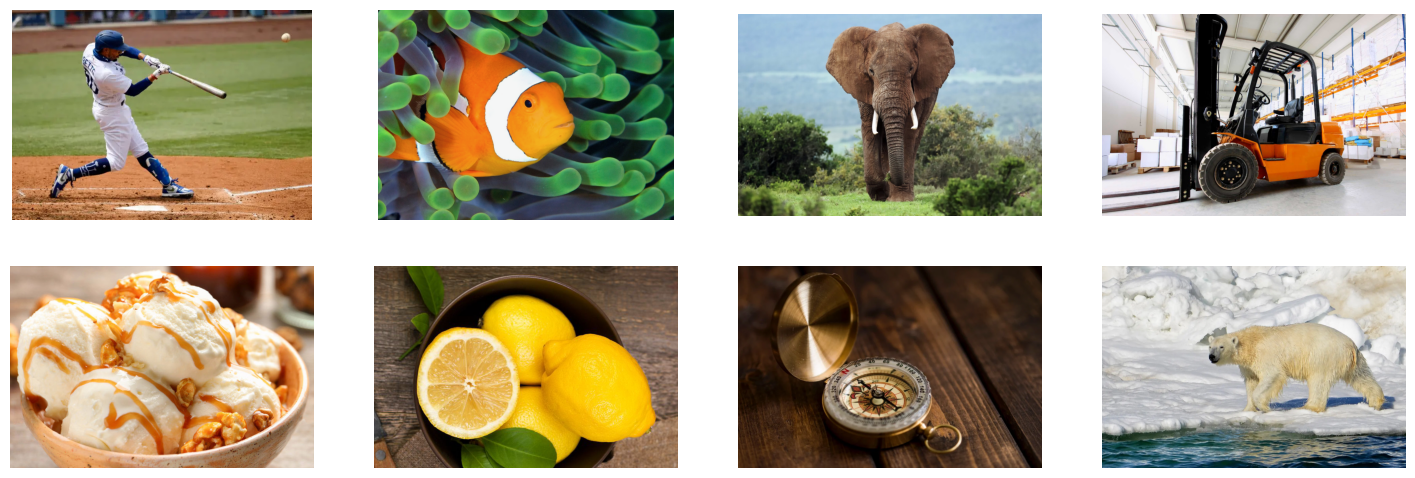

In [7]:
plt.figure(figsize=(18,6))
for idx, image_path in enumerate(image_paths):
    image = plt.imread(image_path)
    plt.subplot(2,4,idx+1)
    plt.imshow(image)
    plt.axis('off')

In [8]:
model_vgg16 = tf.keras.applications.vgg16.VGG16()

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 31s 0us/step


In [9]:
model_resnet50 = tf.keras.applications.resnet50.ResNet50()

102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 22s 0us/step


In [18]:
model_inception_v3 = tf.keras.applications.inception_v3.InceptionV3()

In [19]:
print(model_vgg16.input_shape)
print(model_resnet50.input_shape)
print(model_inception_v3.input_shape)

(None, 224, 224, 3)
(None, 224, 224, 3)
(None, 299, 299, 3)


In [20]:
def process_images(model, image_paths, size, preprocess_input, display_top_k=False, top_k=2):
    
    plt.figure(figsize=(20,7))
    for idx, image_path in enumerate(image_paths):
    
        # Read the image using TensorFlow.
        tf_image = tf.io.read_file(image_path)

        # Decode the above `tf_image` from a Bytes string to a numeric Tensor.
        decoded_image = tf.image.decode_image(tf_image)

        # Resize the image to the spatial size required by the model.
        image_resized = tf.image.resize(decoded_image, size)

        # Add a batch dimension to the first axis (required). 
        image_batch = tf.expand_dims(image_resized, axis=0)

        # Pre-process the input image.
        image_batch = preprocess_input(image_batch)

        # Forward pass through the model to make predictions.
        preds = model.predict(image_batch)

        # Decode (and rank the top-k) predictions. 
        # Returns a list of tuples: (class ID, class description, probability)
        decoded_preds = tf.keras.applications.imagenet_utils.decode_predictions(
            preds=preds,
            top=5
        )
        
        if display_top_k == True:
            for jdx in range(top_k):
                print("Top {} predicted class:   Pr(Class={:20} [index={:4}]) = {:5.2f}".format(
                    jdx + 1, decoded_preds[0][jdx][1], jdx, decoded_preds[0][jdx][2] * 100))
    
        plt.subplot(2,4,idx+1)
        plt.imshow(decoded_image)
        plt.axis('off')
        label = decoded_preds[0][0][1]
        score = decoded_preds[0][0][2] * 100
        title = label + ' ' + str('{:.2f}%'.format(score))
        plt.title(title, fontsize=16)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 543ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


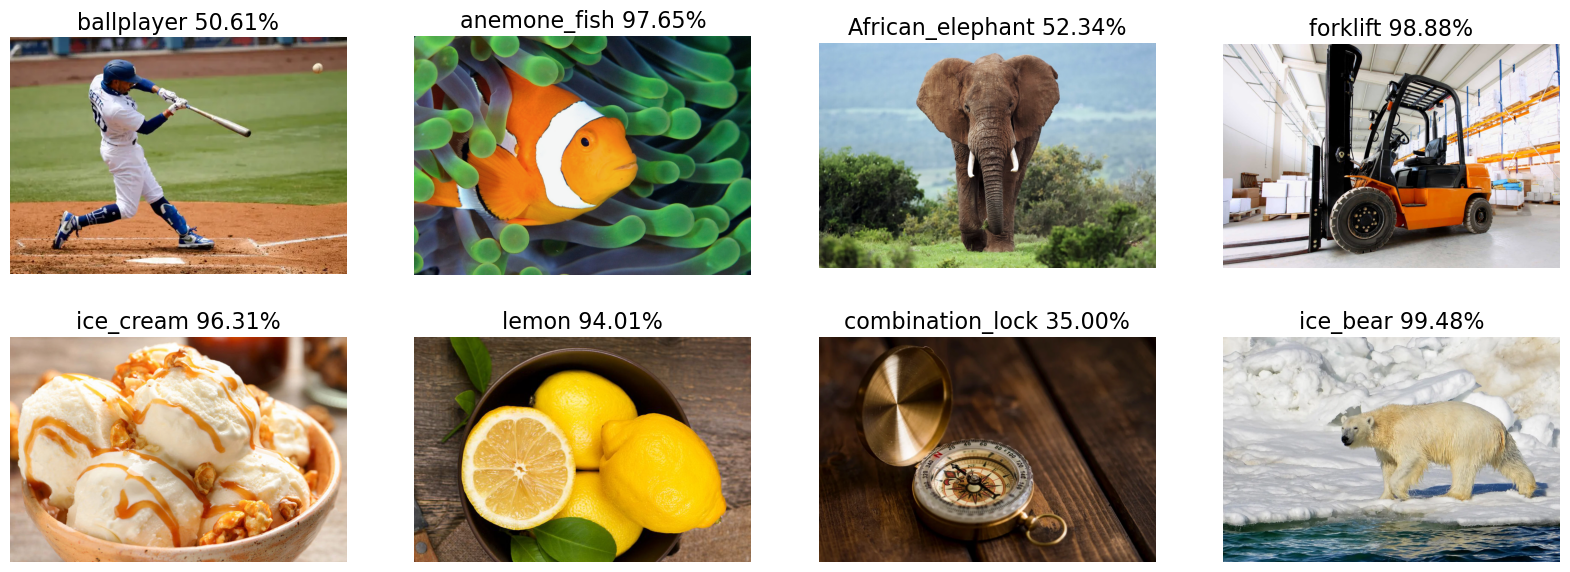

In [21]:
model = model_vgg16
size = (224,224)

preprocess_input = tf.keras.applications.vgg16.preprocess_input

process_images(model, image_paths, size, preprocess_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


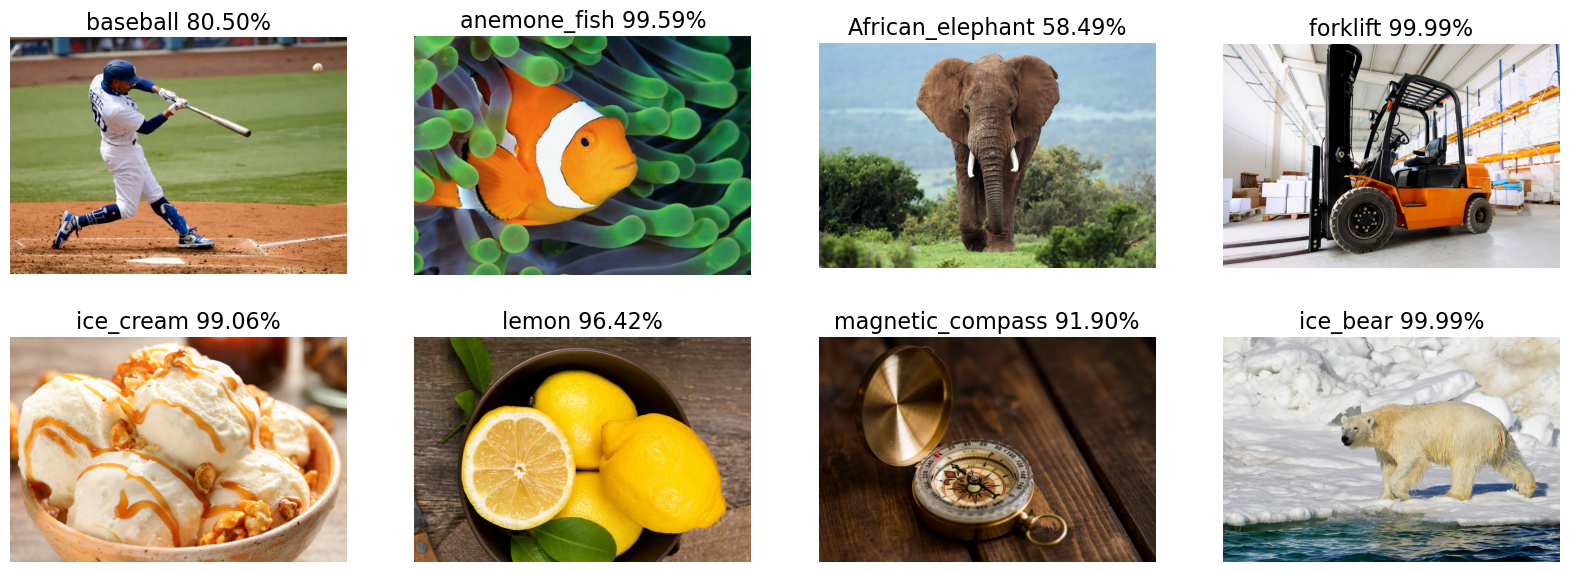

In [22]:
model = model_resnet50
size = (224, 224)

preprocess_input = tf.keras.applications.resnet50.preprocess_input

process_images(model, image_paths, size, preprocess_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
Top 1 predicted class:   Pr(Class=web_site             [index=   0]) = 100.00
Top 2 predicted class:   Pr(Class=leatherback_turtle   [index=   1]) =  0.00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
Top 1 predicted class:   Pr(Class=flatworm             [index=   0]) = 58.80
Top 2 predicted class:   Pr(Class=stopwatch            [index=   1]) = 29.54
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
Top 1 predicted class:   Pr(Class=stopwatch            [index=   0]) = 97.59
Top 2 predicted class:   Pr(Class=web_site             [index=   1]) =  2.41
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
Top 1 predicted class:   Pr(Class=web_site             [index=   0]) = 75.91
Top 2 predicted class:   Pr(Class=English_foxhound     [index=   1]) = 22.58
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
Top 1 predicted class:   Pr(Class=television           [index=   0]) = 77.11
Top 2 predicted class:   Pr(Class=lemon                [index=   1]) = 14.83
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


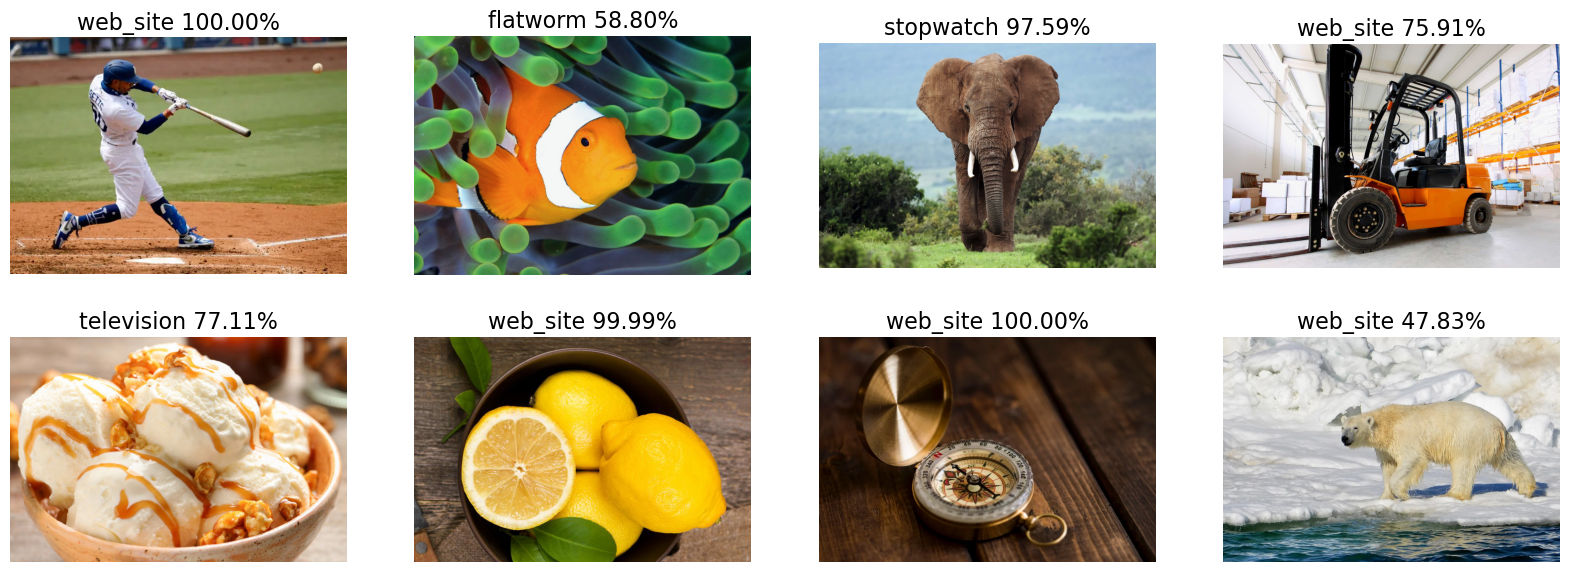

In [23]:
model = model_inception_v3
size = (299, 299)

preprocess_input = tf.keras.applications.resnet50.preprocess_input

process_images(model, image_paths, size, preprocess_input, display_top_k=True)